<a href="https://colab.research.google.com/github/Flurame/ML1/blob/main/Analiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Загрузка библиотек и файла

In [22]:
#Добавление библиотек
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scikit-learn

import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
#Подключение гугл диска для упрощений работы
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Загрузка файла
df = pd.read_csv("/content/drive/MyDrive/ParsedLogsCian.csv")
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393 entries, 0 to 8392
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   author                7592 non-null   object
 1   author_type           7595 non-null   object
 2   url                   7906 non-null   object
 3   location              7906 non-null   object
 4   deal_type             7906 non-null   object
 5   accommodation_type    7906 non-null   object
 6   floor                 7906 non-null   object
 7   floors_count          7906 non-null   object
 8   rooms_count           7906 non-null   object
 9   total_meters          7906 non-null   object
 10  price                 7893 non-null   object
 11  year_of_construction  7906 non-null   object
 12  object_type           7906 non-null   object
 13  have_loggia           7906 non-null   object
 14  parking_type          7906 non-null   object
 15  house_material_type   7906 non-null   

## Работа с файлом

In [6]:
#Удаляем дубликаты и удаляем автора, выводим сколько стало колонок и строк
df.drop_duplicates(inplace=True)
df.drop(['author'], axis=1,inplace=True)

print(f"стало {df.shape[1]} колонок и {df.shape[0]} строк")


стало 26 колонок и 7577 строк


<Axes: >

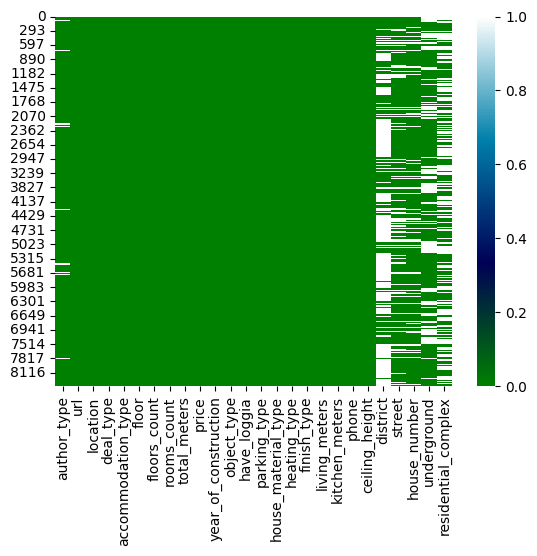

In [7]:
#Вывод нулевых значений
sns.heatmap(df.isnull(), cmap = "ocean")

In [8]:
#Вывод количества нулей в колонках
print(df["district"].isnull().sum(),"-nulls in district")
print(df["underground"].isnull().sum(),"-nulls in underground")
print(df["street"].isnull().sum(),"-nulls in street")

4583 -nulls in district
2277 -nulls in underground
1575 -nulls in street


In [9]:
#Заполнение пропущенных значений, по значениям других столбцов
#Удаление столбца House Number и строк с пропущенными значениями
df['district'].fillna(df['location'], inplace=True)
df.drop(['house_number'], axis=1,inplace=True)
df = df.dropna()

<ipython-input-9-8f824090b1c9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['district'].fillna(df['location'], inplace=True)


<Axes: >

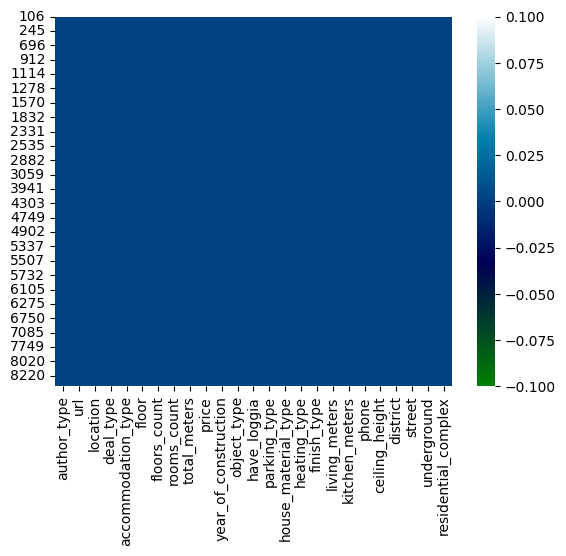

In [10]:
#Вывод итогового количества пропусков
sns.heatmap(df.isnull(), cmap = "ocean")

## Приведение типов

In [11]:
#Перевод объектов в числа
df['floor'] = pd.to_numeric(df['floor'], errors='coerce')
df['floors_count'] = pd.to_numeric(df['floors_count'], errors='coerce')
df['total_meters'] = pd.to_numeric(df['total_meters'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['rooms_count'] = pd.to_numeric(df['rooms_count'], errors='coerce')

In [12]:
#Перевод данных которые должны быть числовыми
df['price_for_metr'] = round((df['price'] / df['total_meters']), 3)
df["price_for_metr"]

,price_for_metr
106,878260.870
107,478000.000
109,388543.597
110,975359.343
111,1047000.000
...,...
8382,163132.137
8385,188697.318
8387,199166.667
8388,163558.106


## Поиск выбросов

In [13]:
#Цены за квадратый метр
print(df.loc[df['price_for_metr'].idxmax()])
print(df.loc[df['floors_count'].idxmax()])
print(df.loc[df['rooms_count'].idxmax()])

author_type                                            developer
url                     https://www.cian.ru/sale/flat/308564823/
location                                                  Москва
deal_type                                                   sale
accommodation_type                                          flat
floor                                                        5.0
floors_count                                                 5.0
rooms_count                                                  5.0
total_meters                                               590.3
price                                               2361200000.0
year_of_construction                                        2027
object_type                                          Новостройка
have_loggia                                                   -1
parking_type                                                  -1
house_material_type                                           -1
heating_type             

In [14]:
df.drop(([df['rooms_count'].idxmax()]), axis = 0, inplace=True)
print(df.loc[df['rooms_count'].idxmax()])

author_type                                            developer
url                     https://www.cian.ru/sale/flat/296921235/
location                                                  Москва
deal_type                                                   sale
accommodation_type                                          flat
floor                                                       24.0
floors_count                                                24.0
rooms_count                                                  5.0
total_meters                                               172.5
price                                                207000000.0
year_of_construction                                        2024
object_type                                          Новостройка
have_loggia                                                   -1
parking_type                                                  -1
house_material_type                          Монолитно-кирпичный
heating_type             

In [15]:
#Код сначала выводит количество строк в DataFrame до удаления.
#Затем удаляются все строки, где количество комнат больше 10.
#После удаления снова выводится количество строк.
#Выводится строка с максимальным количеством комнат в оставшемся DataFrame.

print(f"было {df.shape[0]} строк")
df.drop(df[df['rooms_count'] > 10].index, inplace=True)
print(f"стало {df.shape[0]} строк")
print(df.loc[df['rooms_count'].idxmax()])

было 1929 строк
стало 1929 строк
author_type                                            developer
url                     https://www.cian.ru/sale/flat/296921235/
location                                                  Москва
deal_type                                                   sale
accommodation_type                                          flat
floor                                                       24.0
floors_count                                                24.0
rooms_count                                                  5.0
total_meters                                               172.5
price                                                207000000.0
year_of_construction                                        2024
object_type                                          Новостройка
have_loggia                                                   -1
parking_type                                                  -1
house_material_type                          Монолитно-ки

## Анализ

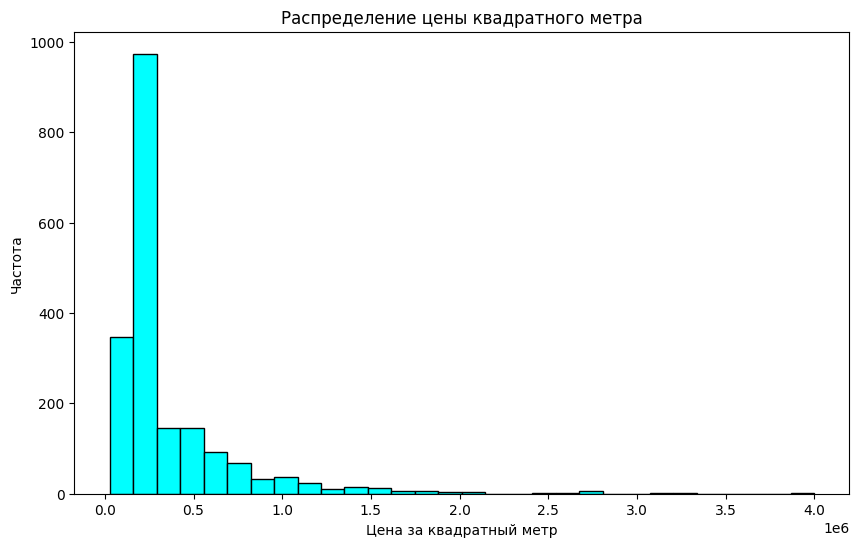

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['price_for_metr'], bins=30, color='cyan', edgecolor='black')
plt.title('Распределение цены квадратного метра')
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Частота')
plt.show()

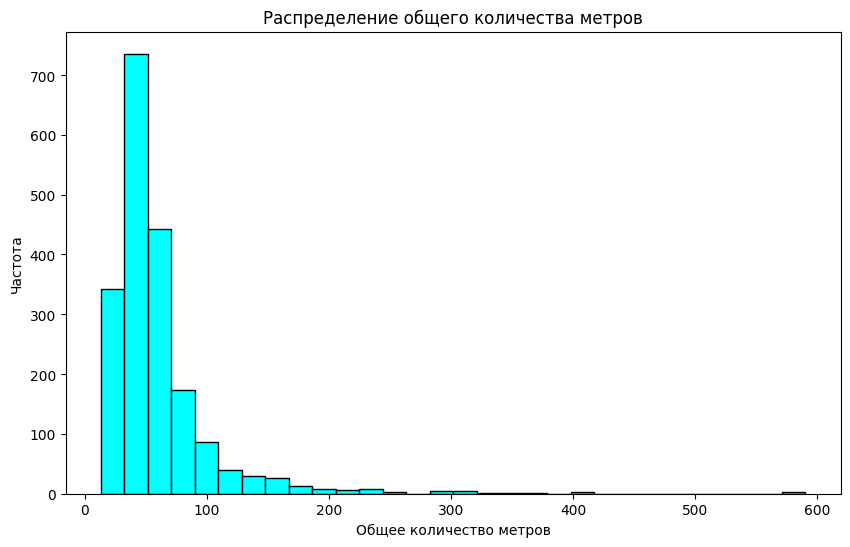

In [17]:
# Пример для признака 'total_sqm' (общее количество метров)
plt.figure(figsize=(10, 6))
plt.hist(df['total_meters'], bins=30, color='cyan', edgecolor='black')
plt.title('Распределение общего количества метров')
plt.xlabel('Общее количество метров')
plt.ylabel('Частота')
plt.show()

Самые частые 50-70 кв.м - двухкомнатная квартира

In [18]:
print(df.loc[df['total_meters'].idxmax()])

author_type                                            developer
url                     https://www.cian.ru/sale/flat/308564823/
location                                                  Москва
deal_type                                                   sale
accommodation_type                                          flat
floor                                                        5.0
floors_count                                                 5.0
rooms_count                                                  5.0
total_meters                                               590.3
price                                               2361200000.0
year_of_construction                                        2027
object_type                                          Новостройка
have_loggia                                                   -1
parking_type                                                  -1
house_material_type                                           -1
heating_type             

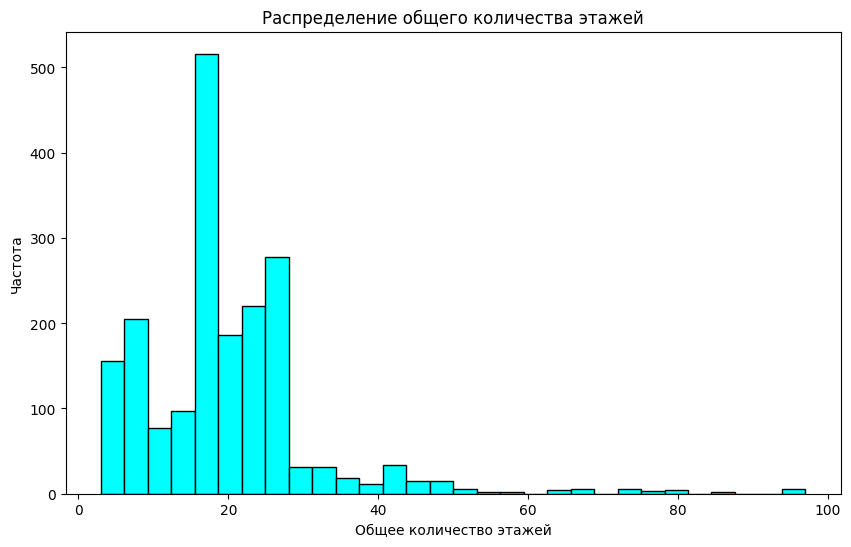

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['floors_count'], bins=30, color='cyan', edgecolor='black')
plt.title('Распределение общего количества этажей')
plt.xlabel('Общее количество этажей')
plt.ylabel('Частота')
plt.show()

Самые частые - 19 и 23-25 этажные здания, что для москвы обычная высота домов

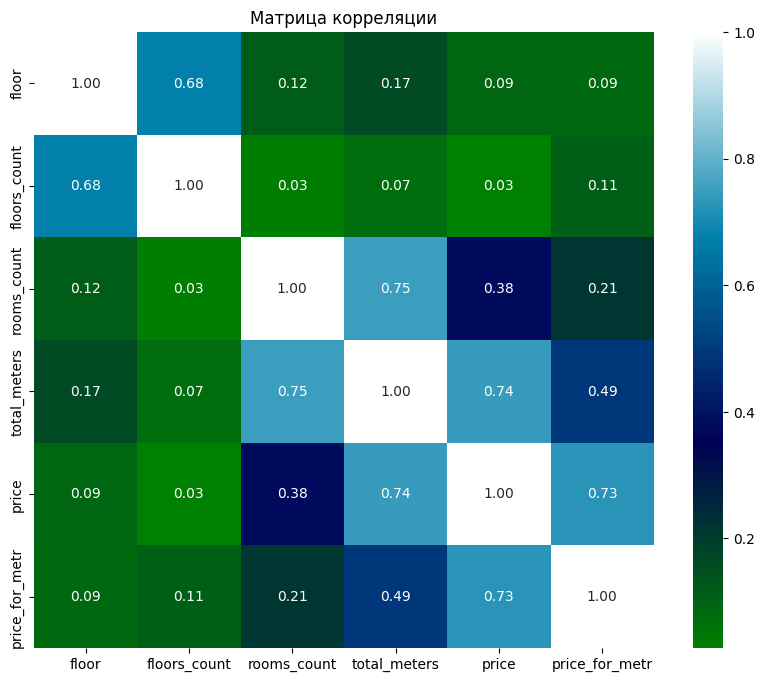

In [20]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Создаем матрицу корреляции
corr_matrix = df[numeric_cols].corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='ocean', fmt='.2f')
plt.title('Матрица корреляции')
plt.show()

На целевую переменную сильно влияют цена и площадь квартиры, чуть меньше влияет количество комнат. На цену влияют площадь и колво комнат. этаж коррелируют количество этажей. Площадь коррелирует с колвом комнат и ценой.
